<a href="https://colab.research.google.com/github/Kirushikesh/Intrusion-Detection-System-with-ML/blob/main/IDS_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

The data set consist of various features to identify whether a traffic is a type of attack or normal. The target class consist of different types of attacks smurf, neptune, back, satan, ipsweep, portsweep, warezclient, teardrop, pod, nmap, guess_passwd, buffer_overflow, land, warezmaster, imap, rootkit, loadmodule, ftp_write, multihop, phf, perl, spy. All those attacks are fall into the main categories of


*   DOS: denial-of-service, e.g. syn flood;
*   R2L: unauthorized access from a remote machine, e.g. guessing password;
*   U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
*   probing: surveillance and other probing, e.g., port scanning.



# Understanding the Dataset

The dataset consist of 41 features(independent variable) to classify the trafic into its specific type denoted by status variable(dependent variable). The input features listed as follows,


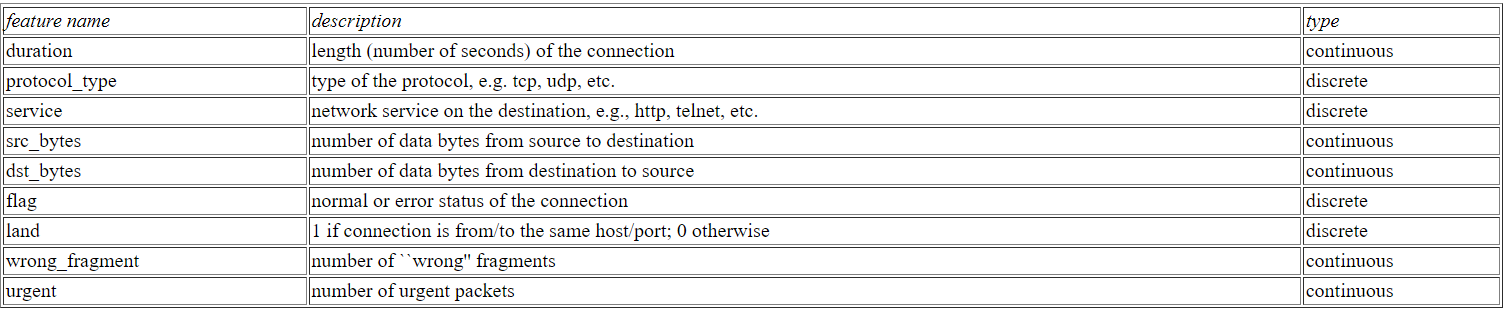

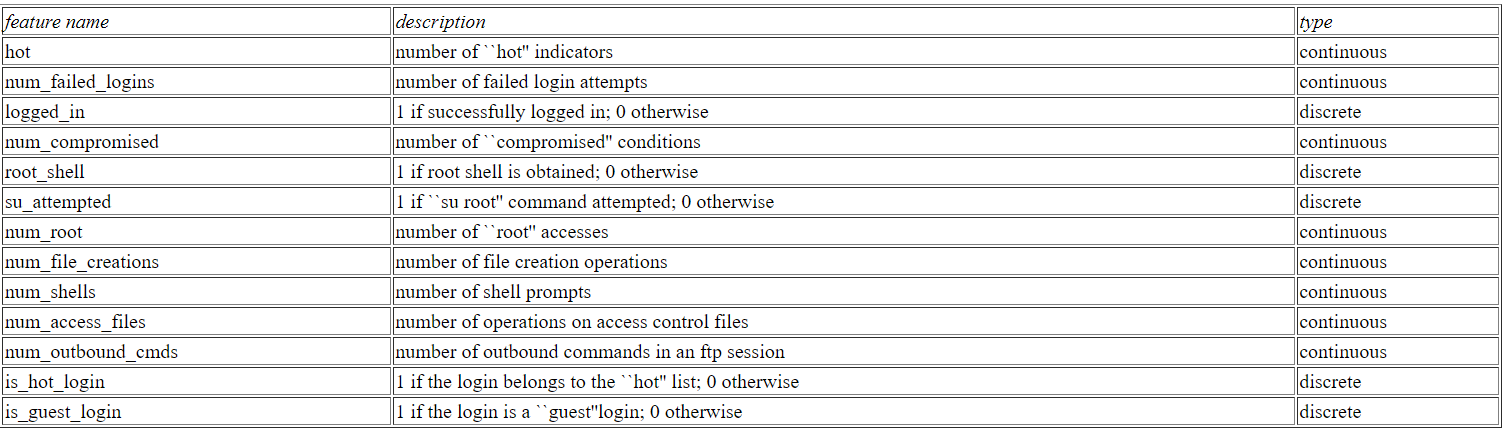

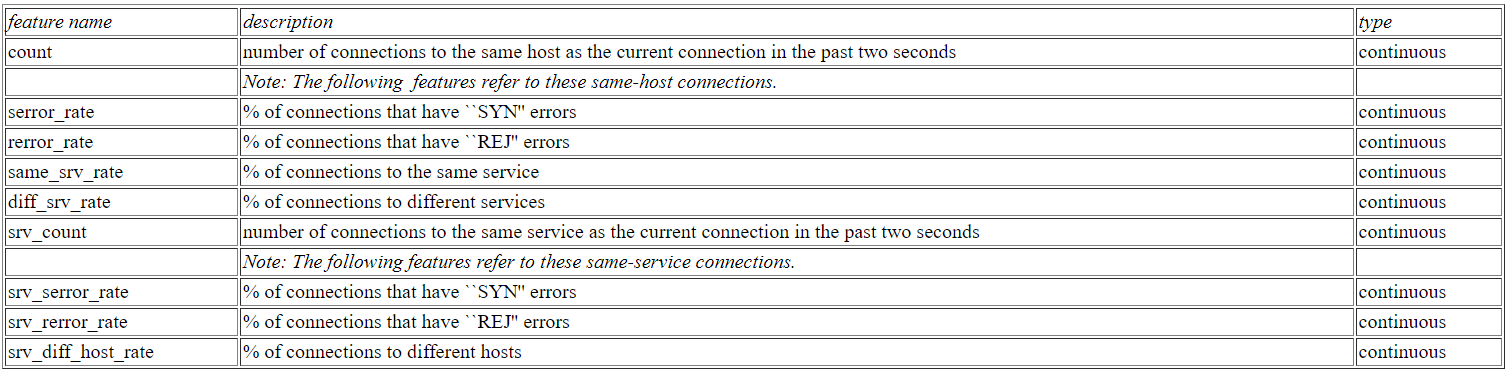

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures.

In [1]:
import pandas as pd
import os

import numpy as np
import sklearn

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=100):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

## Download the Data

In [2]:
def fetch_github_data():
    !wget https://github.com/Kirushikesh/Intrusion-Detection-System-with-ML/raw/main/KDD.rar
    !unrar x KDD.rar && rm KDD.rar
    !unzip KDD/kddcup.data_10_percent.gz.zip -d KDD/ && rm KDD/kddcup.data_10_percent.gz.zip 
    !unzip KDD/kddcup.data.gz.zip -d KDD/ && rm KDD/kddcup.data.gz.zip

In [3]:
fetch_github_data()

--2021-11-11 16:26:51--  https://github.com/Kirushikesh/Intrusion-Detection-System-with-ML/raw/main/KDD.rar
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Kirushikesh/Intrusion-Detection-System-with-ML/main/KDD.rar [following]
--2021-11-11 16:26:51--  https://raw.githubusercontent.com/Kirushikesh/Intrusion-Detection-System-with-ML/main/KDD.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18305019 (17M) [application/octet-stream]
Saving to: ‘KDD.rar’

KDD.rar             100%[===================>]  17.46M  --.-KB/s    in 0.1s    

2021-11-11 16:26:51 (126 MB/s) - ‘KDD.rar’ saved [18305019/183

In [4]:
import pandas as pd

def load_data():
    
    f=open("KDD/kddcup.names",'r')
    data=f.readlines()[1:]

    column_names=[]
    for line in data:
        column_names.append(line.split(':')[0])

    column_names.append('target')
    f.close()

    f=open("KDD/training_attack_types","r")
    data=f.readlines()[:-1]

    attack_type_mapping={'normal':'normal'}
    for line in data:
        k,v=line.split()
        attack_type_mapping[k]=v

    f.close()

    temp=pd.read_csv('KDD/kddcup.data_10_percent.gz',names=column_names)
    temp['target']=temp.target.apply(lambda r: attack_type_mapping[r[:-1]])
    
    return temp

## Take a Quick Look at the Data Structure

In [5]:
ids=load_data()
ids.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [6]:
ids.shape

(494021, 42)

In [7]:
ids.drop_duplicates(inplace=True)

In [8]:
ids.shape

(145585, 42)

In [9]:
ids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145585 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145585 non-null  int64  
 1   protocol_type                145585 non-null  object 
 2   service                      145585 non-null  object 
 3   flag                         145585 non-null  object 
 4   src_bytes                    145585 non-null  int64  
 5   dst_bytes                    145585 non-null  int64  
 6   land                         145585 non-null  int64  
 7   wrong_fragment               145585 non-null  int64  
 8   urgent                       145585 non-null  int64  
 9   hot                          145585 non-null  int64  
 10  num_failed_logins            145585 non-null  int64  
 11  logged_in                    145585 non-null  int64  
 12  num_compromised              145585 non-null  int64  
 13 

In [10]:
ids.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,145585.000000,1.455850e+05,1.455850e+05,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.0,145585.0,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000
mean,132.026088,7.995754e+03,2.859800e+03,0.000137,0.020201,0.000048,0.100175,0.000515,0.491493,0.026177,0.000378,0.000124,0.038520,0.003675,0.000371,0.003414,0.0,0.0,0.004705,74.386097,13.011547,0.291381,0.291553,0.108356,0.108412,0.655192,0.040576,0.093080,181.469416,129.935563,0.553219,0.061389,0.092819,0.019048,0.291599,0.290980,0.110464,0.107676
std,1224.161209,1.820390e+06,6.081000e+04,0.011720,0.239369,0.010150,1.426803,0.028586,0.499929,3.311384,0.019433,0.014354,3.707506,0.177582,0.020298,0.067091,0.0,0.0,0.068433,100.336106,30.736215,0.452904,0.453567,0.308962,0.308806,0.446795,0.120396,0.241953,99.097409,114.714725,0.456236,0.147021,0.241112,0.060410,0.452493,0.453448,0.306098,0.304221
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,78.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.880000e+02,1.165000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,132.000000,15.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.030000,0.020000,1.000000,1.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Saving figure attribute_histogram_plots


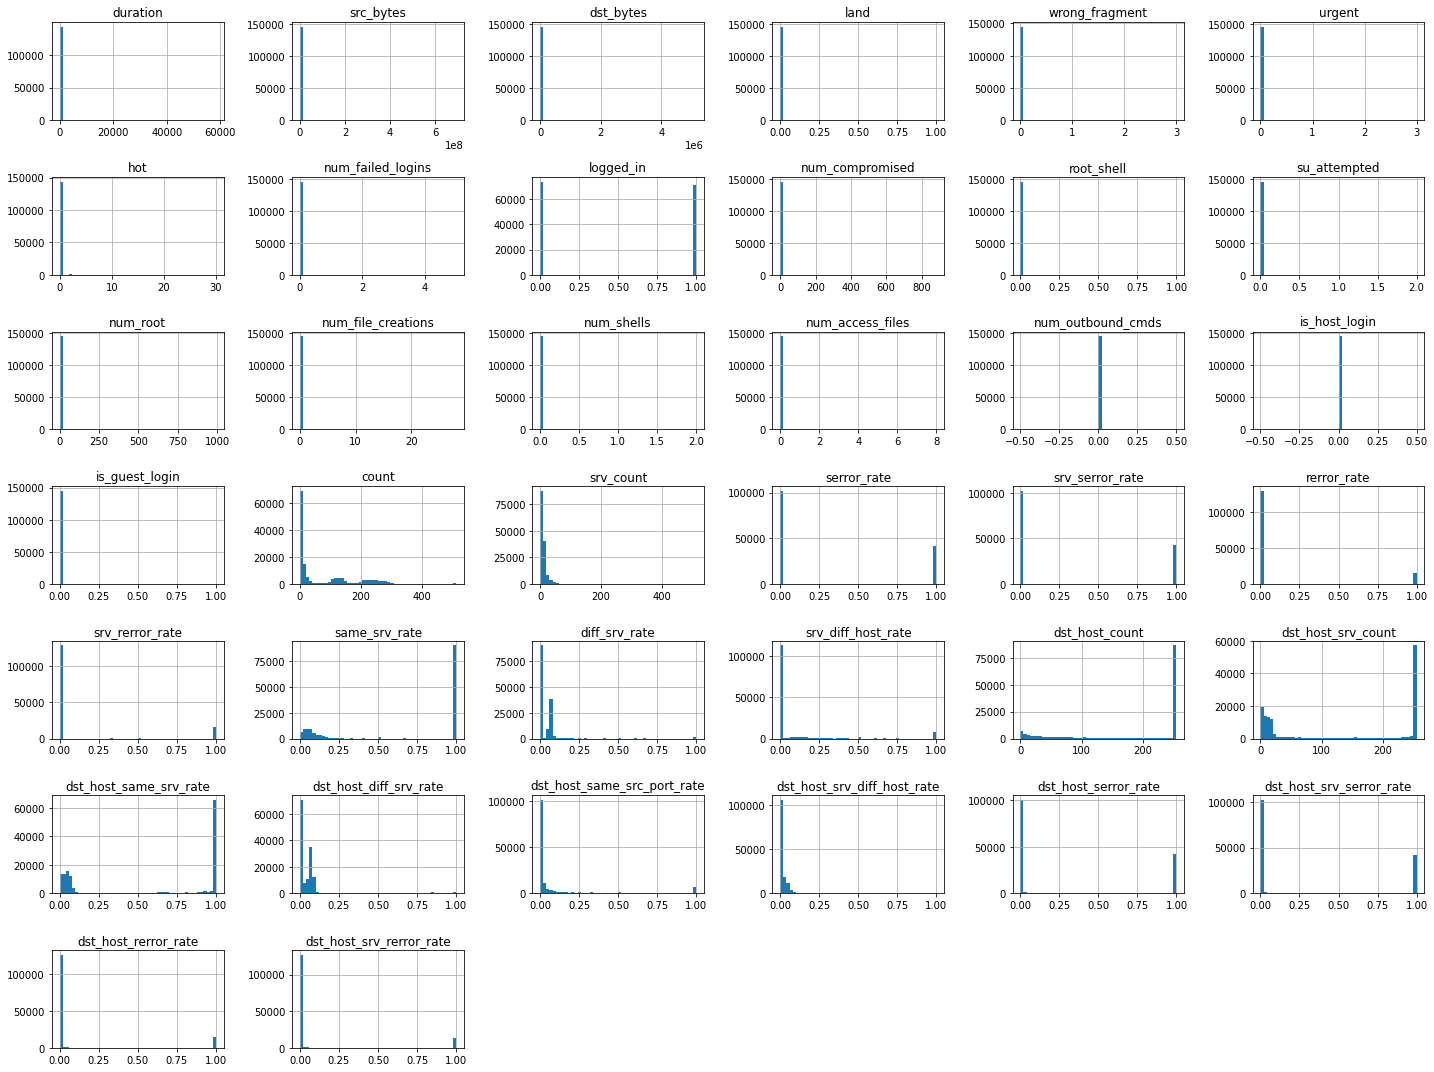

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

ids.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Saving figure Categorical Column visualization


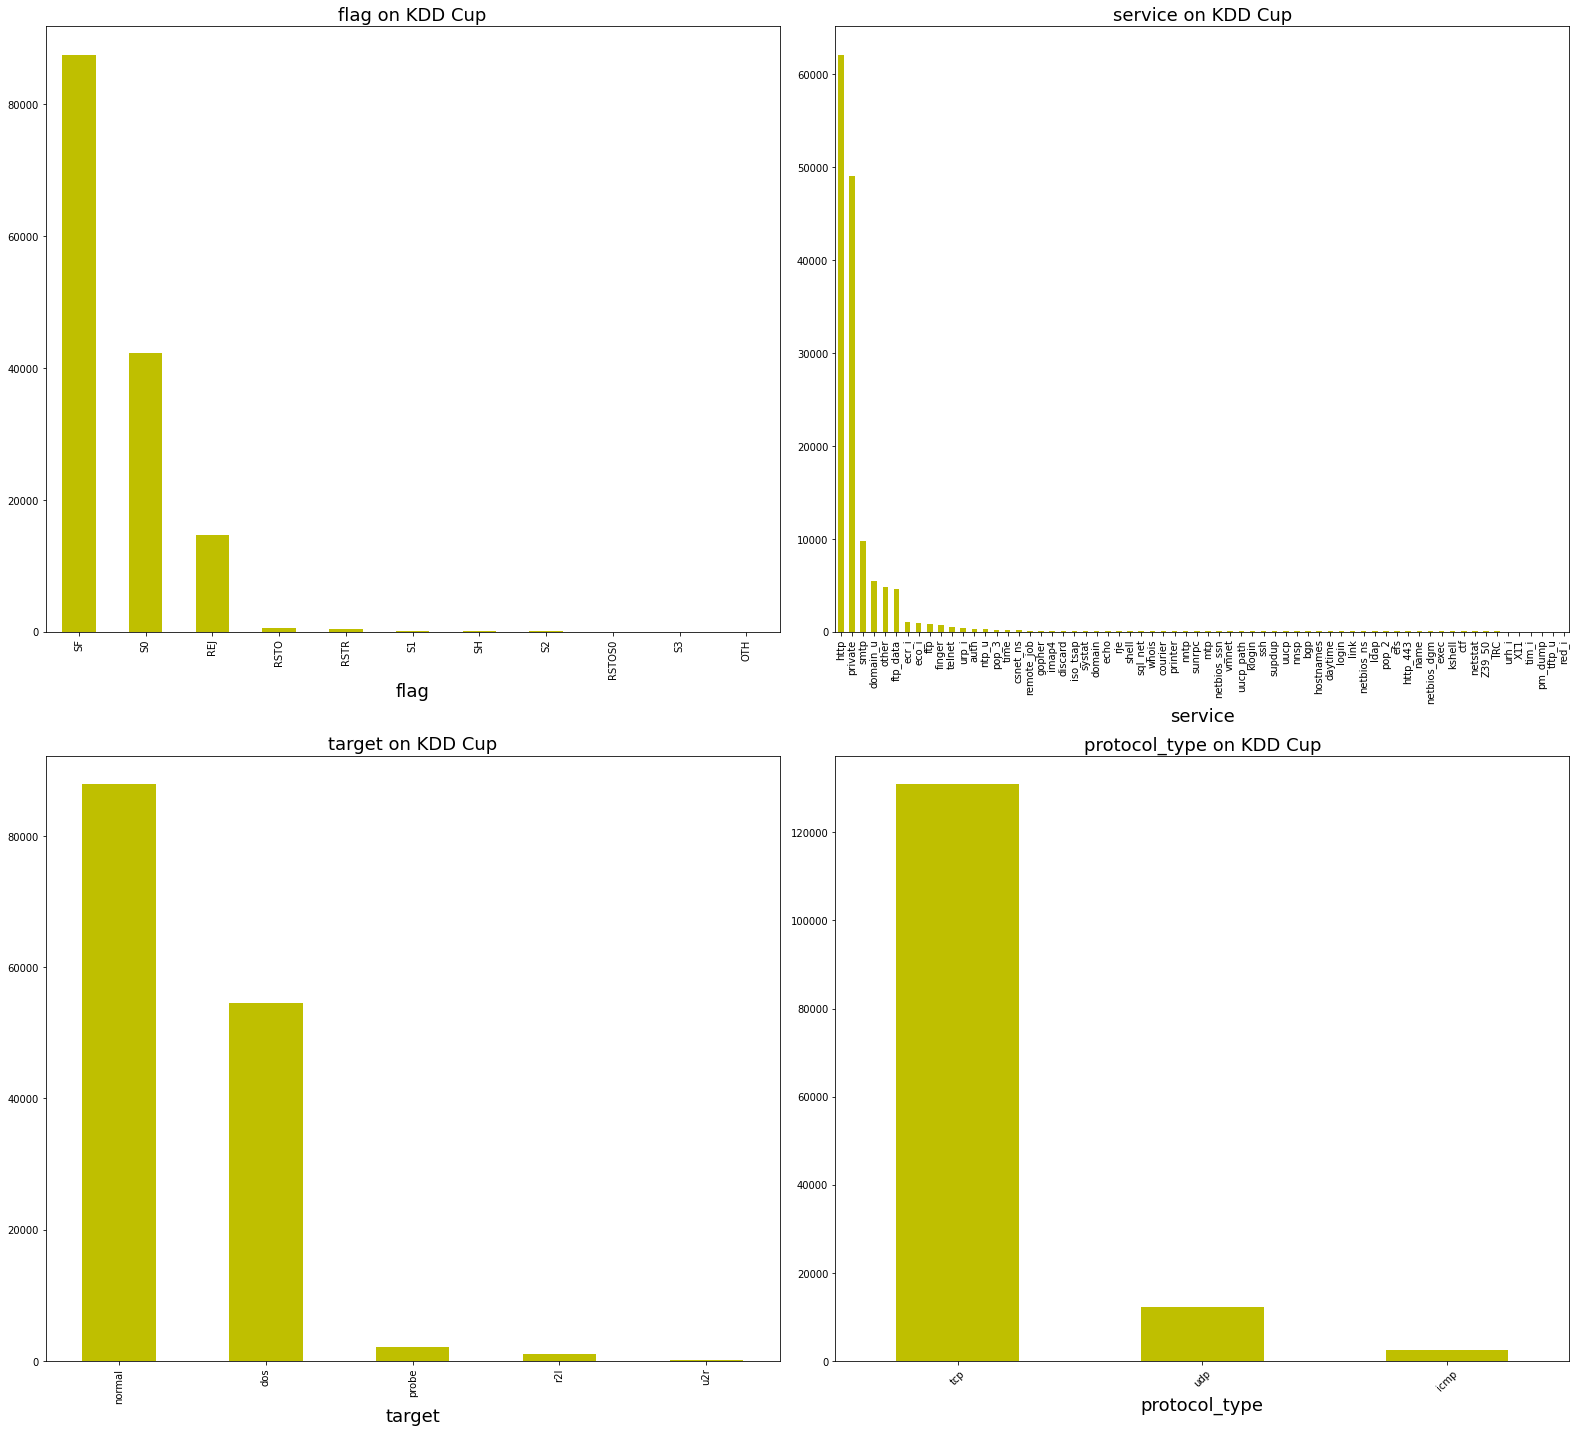

In [12]:
categorical_features = ['flag', 'service', 'target', 'protocol_type']
def plot_dist(col, ax):
    ids[col].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=18)
    ax.set_title("{} on KDD Cup".format(col), fontsize= 18)
    plt.xticks(rotation=45)
    return ax

f, ax = plt.subplots(2,2, figsize = (22,20))
f.tight_layout(h_pad=15, w_pad=10, rect=[0, 0.08, 1, 0.93])

k = 0
for i in range(2):
    for j in range(2):
        plot_dist(categorical_features[k], ax[i][j])
        k += 1

save_fig('Categorical Column visualization')
plt.show()

In [13]:
ids['target'].value_counts()

normal    87832
dos       54572
probe      2130
r2l         999
u2r          52
Name: target, dtype: int64

## Create a Validation and Test Set

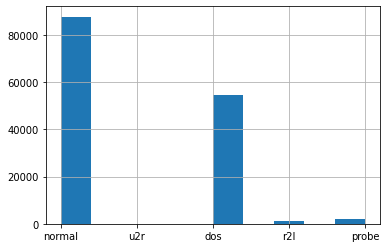

In [14]:
ids['target'].hist()

In [15]:
from sklearn.model_selection import train_test_split

train_set,strat_test_set = train_test_split(ids,test_size=0.2,random_state=42,stratify=ids['target'])
strat_train_set,strat_val_set=train_test_split(train_set,test_size=0.2,random_state=42,stratify=train_set['target'])

In [16]:
strat_test_set["target"].value_counts() / len(strat_test_set)

normal    0.603290
dos       0.374867
probe     0.014631
r2l       0.006869
u2r       0.000343
Name: target, dtype: float64

In [17]:
ids['target'].value_counts() / len(ids)

normal    0.603304
dos       0.374846
probe     0.014631
r2l       0.006862
u2r       0.000357
Name: target, dtype: float64

# Discover and Visualize the Data to Gain Insights

In [18]:
ids = strat_train_set.copy()

## Looking through the data in Deep

Saving figure Protocol_type vs target status


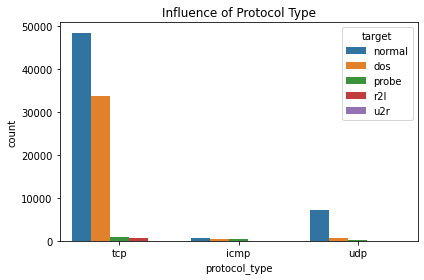

In [19]:
import seaborn as sns

sns.countplot(x = 'protocol_type',hue = "target",data = ids).set(title='Influence of Protocol Type')
save_fig("Protocol_type vs target status")
plt.show()

Most of the UDP protocols denote the normal traffic.

Saving figure Guest Login vs Traffic status


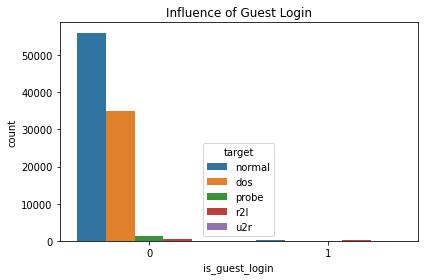

In [20]:
import seaborn as sns

sns.countplot(x = 'is_guest_login',hue = "target",data = ids).set(title='Influence of Guest Login')
save_fig("Guest Login vs Traffic status")
plt.show()

If it is not a guest login then more chance the traffic denotes DOS attack.

Saving figure Land status vs Target


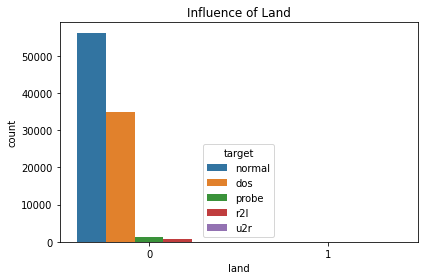

In [21]:
import seaborn as sns

sns.countplot(x = 'land',hue = "target",data = ids).set(title='Influence of Land')
save_fig("Land status vs Target")
plt.show()

## Looking for Correlations

Saving figure Correlation plot of the data


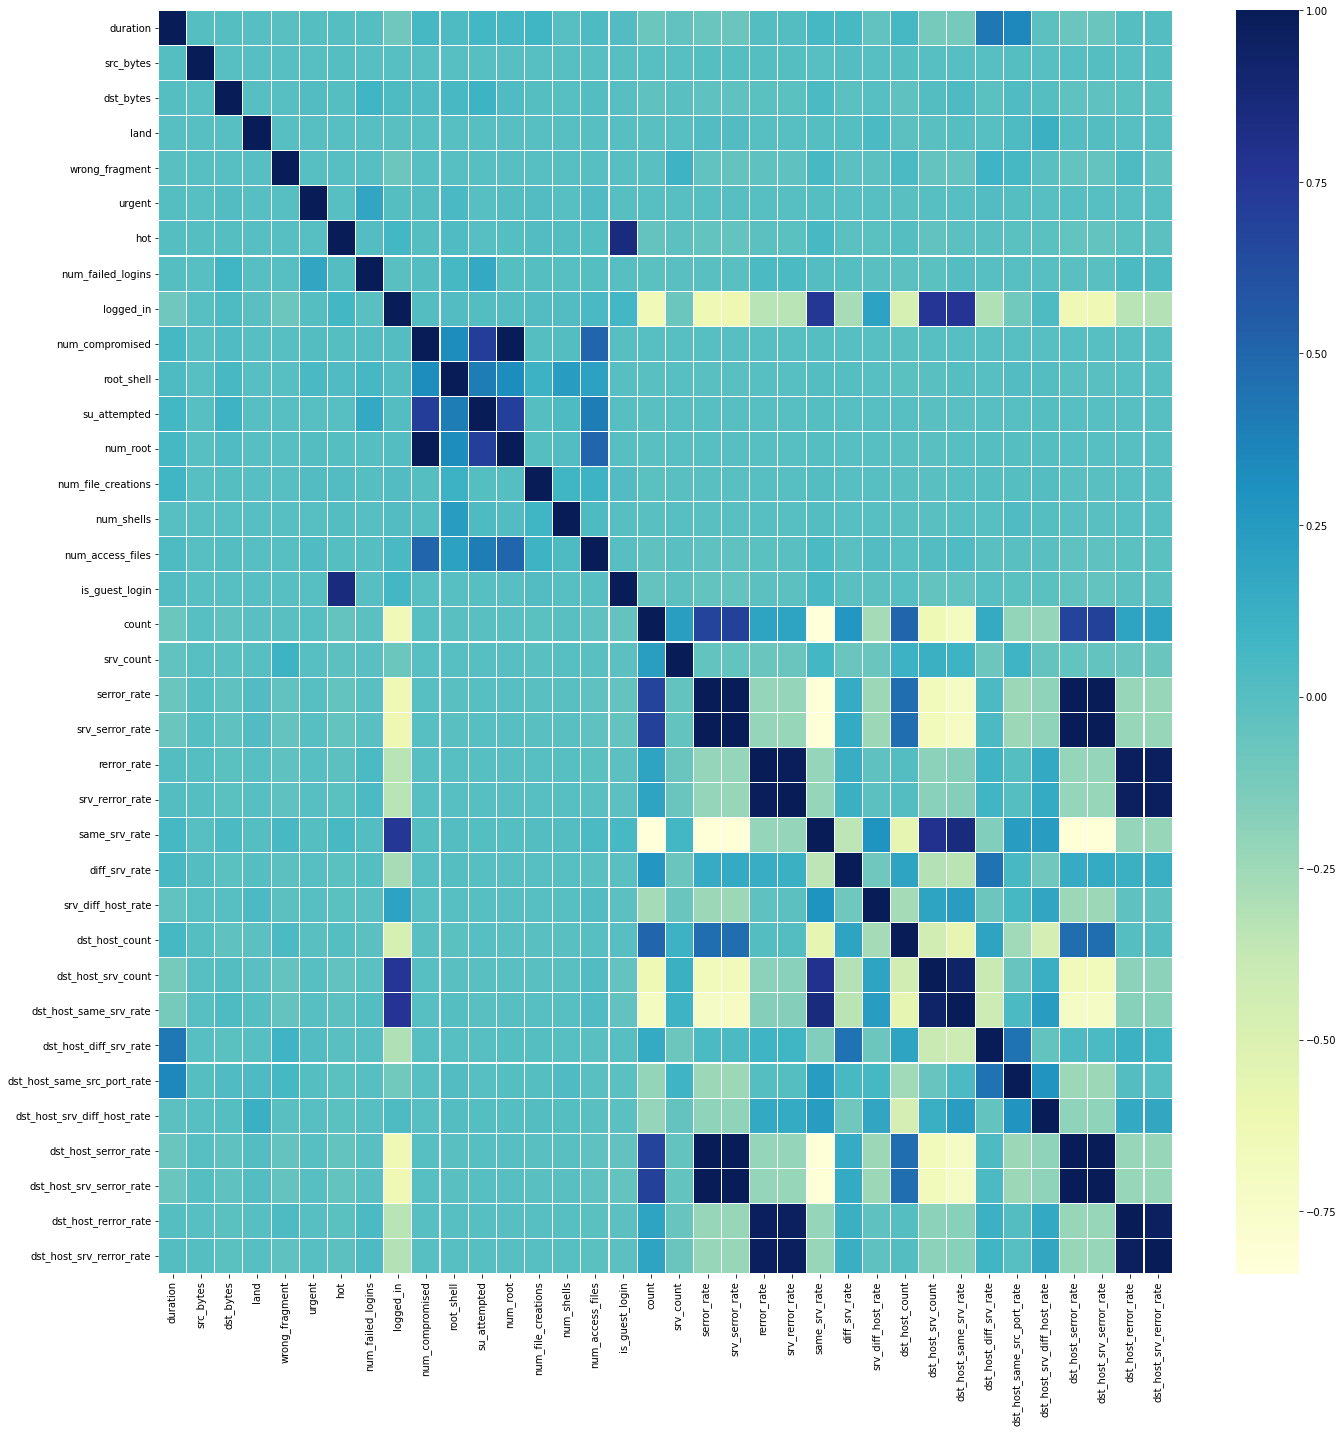

In [22]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize =(20,20)) 

corr_matrix=ids.drop(['num_outbound_cmds','is_host_login'],axis=1).corr()
sns.heatmap(corr_matrix,ax = ax,cmap ="YlGnBu", linewidths = 0.1)

save_fig('Correlation plot of the data')
plt.show()

In [23]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
ids.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
ids.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
ids.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
ids.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
ids.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
ids.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
ids.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
ids.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

#This variable has zeroes in all the instances so we are ignored for analyzsis.
ids.drop(['num_outbound_cmds','is_host_login'],axis=1,inplace=True)

In [24]:
ids.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target
90308,0,tcp,http,SF,183,2333,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.00,0.00,0.0,5,255,0.00,0.20,0.02,normal
378975,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,134,8,1.0,0.0,0.06,0.05,0.0,255,8,0.05,0.00,0.00,dos
80287,0,tcp,http,SF,359,700,0,0,0,0,0,1,0,0,0,0,0,0,0,8,8,0.0,0.0,1.00,0.00,0.0,255,255,0.00,0.00,0.00,normal
481062,0,icmp,urp_i,SF,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,7,0.0,0.0,0.88,0.25,0.0,255,23,0.01,0.11,0.00,normal
349283,0,tcp,http,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,1.0,1.00,0.00,0.0,2,37,0.00,0.50,0.38,normal


# Prepare the Data for ML Algorithms

In [25]:
ids=strat_train_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)
ids_labels=strat_train_set['target'].copy()

In [26]:
from sklearn.preprocessing import LabelEncoder

target_encoder=LabelEncoder()
target_encoder.fit(ids_labels)
ids_labels=target_encoder.transform(ids_labels)

## Data Cleaning

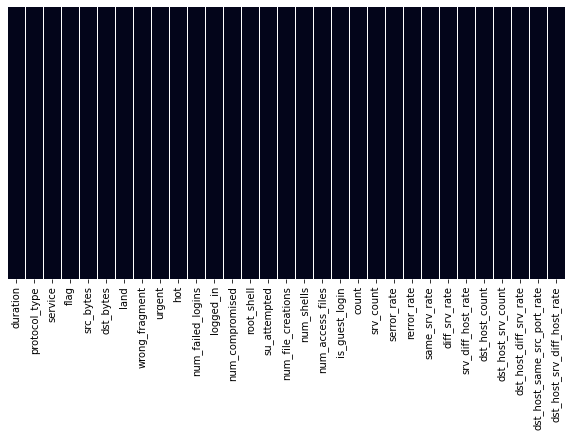

In [27]:
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(ids.isnull(),yticklabels=False,cbar=False)

plt.show()

## Handling Text and Categorical Attributes

In [28]:
ids_cat=ids[['flag', 'service', 'protocol_type']]
ids_cat.head(10)

,flag,service,protocol_type
90308,SF,http,tcp
378975,S0,private,tcp
80287,SF,http,tcp
481062,SF,urp_i,icmp
349283,REJ,http,tcp
357370,S0,private,tcp
23902,SF,http,tcp
78495,SF,http,tcp
460364,REJ,ssh,tcp
383565,S0,private,tcp


In [29]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
ids_cat_1hot = cat_encoder.fit_transform(ids_cat)
ids_cat_1hot

<93174x79 sparse matrix of type '<class 'numpy.float64'>'
	with 279522 stored elements in Compressed Sparse Row format>

In [30]:
ids_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [31]:
ids_cat_1hot.shape

(93174, 79)

In [32]:
cat_encoder.categories_

[array(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
        'SF', 'SH'], dtype=object),
 array(['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns',
        'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i',
        'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher',
        'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin',
        'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
        'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
        'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
        'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
        'sunrpc', 'supdup', 'systat', 'telnet', 'tim_i', 'time', 'urh_i',
        'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'], dtype=object),
 array(['icmp', 'tcp', 'udp'], dtype=object)]

## Outlier Detection

In [33]:
ids_num=ids.drop(['flag', 'service','protocol_type'],axis=1)
ids_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
90308,0,183,2333,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.00,0.00,0.0,5,255,0.00,0.20,0.02
378975,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,134,8,1.0,0.0,0.06,0.05,0.0,255,8,0.05,0.00,0.00
80287,0,359,700,0,0,0,0,0,1,0,0,0,0,0,0,0,8,8,0.0,0.0,1.00,0.00,0.0,255,255,0.00,0.00,0.00
481062,0,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,7,0.0,0.0,0.88,0.25,0.0,255,23,0.01,0.11,0.00
349283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,1.0,1.00,0.00,0.0,2,37,0.00,0.50,0.38


In [34]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest()
outlier_pred = isolation_forest.fit_predict(ids_num)

ids_clean = ids[outlier_pred == 1]
ids_labels_clean = ids_labels[outlier_pred == 1]

In [35]:
ids_clean.shape,ids_labels_clean.shape

((86058, 31), (86058,))

## Transformer Pipeline

In [36]:
from sklearn.preprocessing import StandardScaler

standadizer=StandardScaler()
ids_num_tr=standadizer.fit_transform(ids_num)

ids_num_tr

array([[-0.10782789, -0.0045491 , -0.00850249, ..., -0.41781426,
         0.44001943,  0.01745376],
       [-0.10782789, -0.00462958, -0.04887979, ..., -0.07964627,
        -0.38545887, -0.31650996],
       [-0.10782789, -0.0044717 , -0.03676487, ..., -0.41781426,
        -0.38545887, -0.31650996],
       ...,
       [-0.10782789, -0.00462958, -0.04887979, ...,  0.05562093,
        -0.38545887, -0.31650996],
       [-0.10782789, -0.0042694 , -0.04311655, ...,  3.64020168,
         0.44001943,  0.01745376],
       [-0.10782789, -0.00462958, -0.04887979, ...,  0.19088813,
        -0.38545887, -0.31650996]])

In [37]:
from sklearn.compose import ColumnTransformer

num_attribs = list(ids_num)
cat_attribs = ['flag', 'service','protocol_type']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

ids_prepared = full_pipeline.fit_transform(ids_clean)
ids_labels=ids_labels_clean.copy()

In [38]:
ids_prepared.shape

(86058, 105)

In [39]:
from collections import Counter
Counter(ids_labels)

Counter({0: 33443, 1: 52110, 2: 156, 3: 334, 4: 15})

# A Binary Classification Example

In [40]:
ids_bin_labels=(ids_labels==1).astype(np.int)
#1 denotes the normal 

In [41]:
from sklearn.linear_model import LogisticRegression

sgd_clf=LogisticRegression(penalty='l1',solver='liblinear')
sgd_clf.fit(ids_prepared,ids_bin_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
from sklearn.metrics import confusion_matrix

ids_predictions=sgd_clf.predict(ids_prepared)
confusion_matrix(ids_bin_labels,ids_predictions)

array([[33805,   143],
       [   29, 52081]])

In [43]:
x_val=strat_val_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)
y_val=strat_val_set['target'].copy()

x_val_prepared=full_pipeline.transform(x_val)
validation_prediction=sgd_clf.predict(x_val_prepared)

y_val=target_encoder.transform(y_val)
y_bin_val=(y_val==1).astype(np.int)

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(y_bin_val,validation_prediction))
print(precision_score(y_bin_val,validation_prediction))
print(recall_score(y_bin_val,validation_prediction))
confusion_matrix(y_bin_val,validation_prediction)

0.9875933716836953
0.9844431930170351
0.9951611755497047


array([[ 9020,   221],
       [   68, 13985]])

#Select and Train a Model

## SoftmaxRegreesion

In [45]:
from sklearn.linear_model import LogisticRegression

softmax_reg=LogisticRegression(multi_class='multinomial',max_iter=1000)
softmax_reg.fit(ids_prepared,ids_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
some_data = ids.iloc[:5]
some_labels = ids_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", softmax_reg.predict(some_data_prepared))

Predictions: [1 0 1 1 1]


In [47]:
print("Labels:", list(some_labels))

Labels: [1, 0, 1, 1, 0]


In [48]:
from sklearn.metrics import confusion_matrix

ids_predictions=softmax_reg.predict(ids_prepared)
confusion_matrix(ids_labels,ids_predictions)

array([[33428,    15,     0,     0,     0],
       [   10, 52086,     7,     6,     1],
       [    4,    44,   108,     0,     0],
       [    0,    34,     0,   300,     0],
       [    0,     6,     0,     3,     6]])

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh_clf = KNeighborsClassifier()
neigh_clf.fit(ids_prepared,ids_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Note: The below cell may run for 15 min. More depend on your hardware.

In [ ]:
from sklearn.metrics import confusion_matrix

ids_predictions=neigh_clf.predict(ids_prepared)
confusion_matrix(ids_labels,ids_predictions)

array([[33547,     6,     2,     0,     0],
       [    7, 53199,     5,    15,     0],
       [    2,    17,   204,     0,     0],
       [    0,    17,     0,   345,     0],
       [    0,    12,     0,     2,     2]])

# Evaluate the model using Validation set

In [49]:
x_val=strat_val_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)

y_val=strat_val_set['target'].copy()

x_val_prepared=full_pipeline.transform(x_val)
y_val=target_encoder.transform(y_val)

In [50]:
validation_prediction=softmax_reg.predict(x_val_prepared)

In [51]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(y_val,validation_prediction))
print(precision_score(y_val,validation_prediction,average='weighted'))
print(recall_score(y_val,validation_prediction,average='weighted'))
confusion_matrix(y_val,validation_prediction)

0.9805958615952606
0.9796310615079623
0.9805958615952606


array([[ 8565,   153,    13,     1,     0],
       [   22, 13983,    33,    12,     3],
       [  101,    26,   209,     5,     0],
       [   47,    29,     1,    79,     4],
       [    0,     2,     0,     0,     6]])

In [ ]:
validation_prediction=neigh_clf.predict(x_val_prepared)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(y_val,validation_prediction))
print(precision_score(y_val,validation_prediction,average='weighted'))
print(recall_score(y_val,validation_prediction,average='weighted'))
confusion_matrix(y_val,validation_prediction)

0.9707220743539109
0.9679661715982594
0.9707220743539109


array([[ 8477,   252,     1,     2,     0],
       [    3, 13951,    93,     6,     0],
       [    0,   239,    97,     5,     0],
       [    1,    74,     0,    85,     0],
       [    0,     5,     0,     1,     2]])

# Fine Tune The Best Model

The softmax regressor performs better than the knn classifier. So lets tune some of the hyperparameters of softmax regressor using GridSearchCV.

Note : The below cell will take more than 30 min more depending on your hardware.

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

params_grid=[
    {
        'penalty' : ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'multi_class' : ['multinomial'],
        'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter' : [400]
    },
    {
        'penalty' : ['l1'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'multi_class' : ['multinomial'],
        'solver' : ['saga'],
        'max_iter' : [400]
    }
]


best_score=0.0
best_params={}

for params in ParameterGrid(params_grid):
    softmax_reg=LogisticRegression(**params)
    softmax_reg.fit(ids_prepared,ids_labels)
    
    validation_prediction=softmax_reg.predict(x_val_prepared)
    curr_score=f1_score(y_val,validation_prediction,average='weighted')

    if(curr_score>best_score):
        print(curr_score)
        best_score=curr_score
        best_params=params

#
#grid_search=GridSearchCV(softmax_reg,params_grid,cv=5,verbose=2)
#grid_search.fit(ids_prepared,ids_labels)

In [55]:
best_params,best_score

({'C': 1000,
  'max_iter': 400,
  'multi_class': 'multinomial',
  'penalty': 'l2',
  'solver': 'newton-cg'},
 0.981611910850322)

# Evaluate on Test set

In [56]:
from sklearn.linear_model import LogisticRegression

softmax_reg=LogisticRegression(**best_params)
softmax_reg.fit(ids_prepared,ids_labels)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
x_test=strat_test_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)

y_test=strat_test_set['target'].copy()

x_test_prepared=full_pipeline.transform(x_test)
y_test=target_encoder.transform(y_test)

In [60]:
test_prediction=softmax_reg.predict(x_test_prepared)
f1_score(y_test,test_prediction,average='weighted')

0.9811710006609936

# Conclusion

We seen the Preprocessing steps and learned 2 algorithms and how to use validation set to select hyperparameters. Finally used the best parameters on test set and got nice f1score. Thankyou